<a href="https://colab.research.google.com/github/Anisha-singh2207/Anisha-singh2207/blob/main/Machine%20learning%20notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [4]:
df=pd.read_csv('/content/placement_lyst1729240397995.csv')

In [ ]:
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [5]:
import seaborn as sns

<ipython-input-6-dd1eca269673>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])


<Axes: xlabel='cgpa', ylabel='Density'>

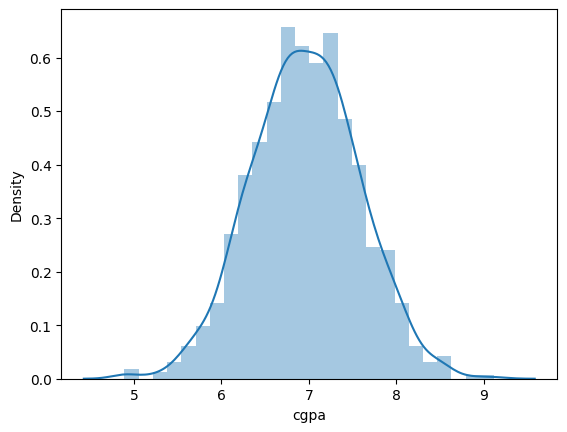

In [6]:
sns.distplot(df['cgpa'])

In [7]:
# finding the boundary
upper_fence=df['cgpa'].mean()+3*df['cgpa'].std()
lower_fence=df['cgpa'].mean()-3*df['cgpa'].std()

In [8]:
upper_fence

np.float64(8.808933625397168)

In [9]:
lower_fence

np.float64(5.113546374602832)

In [10]:
df[df["cgpa"]<lower_fence]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [11]:
df[df["cgpa"]>upper_fence]

,cgpa,placement_exam_marks,placed
995,8.87,44.0,1
996,9.12,65.0,1


<ipython-input-12-e2b4c2324d7c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["placement_exam_marks"])


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

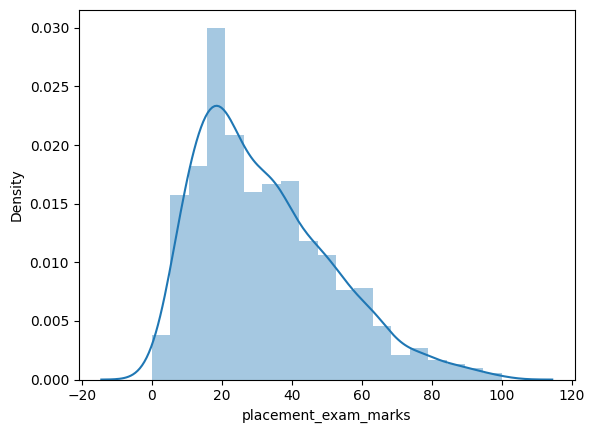

In [12]:
sns.distplot(df["placement_exam_marks"])

<Axes: ylabel='placement_exam_marks'>

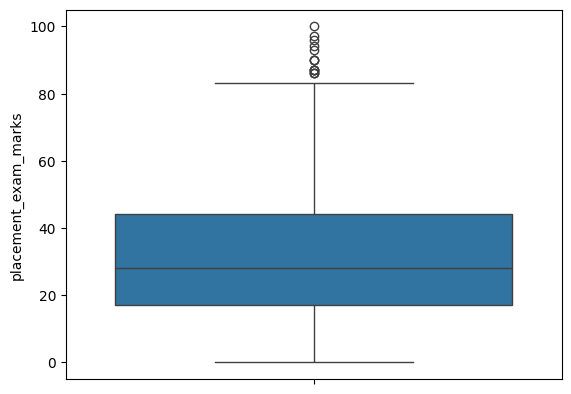

In [13]:
sns.boxplot(df["placement_exam_marks"])

In [14]:
  q1=df["placement_exam_marks"].quantile(0.25)
q3=df["placement_exam_marks"].quantile(0.75)

In [15]:
q1

np.float64(17.0)

In [16]:
IQR=q3-q1

In [30]:
upper=q3+1.5*(IQR)
lower=q1-1.5*(IQR)

In [31]:
upper

np.float64(84.5)

In [32]:
lower

np.float64(-23.5)

In [33]:
df[upper<df["placement_exam_marks"]]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [36]:
#treatment of outliers by deleting it
df = df[(df["cgpa"] > lower_fence) & (df["cgpa"] < upper_fence)]
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [26]:
# capping
import numpy as np

In [27]:
cap=df.copy()

In [28]:
cap["placement_exam_marks"]=np.where(cap["placement_exam_marks"]>upper_fence,
                                     np.where(cap["placement_exam_marks"]<lower_fence,lower_fence,upper_fence),cap["placement_exam_marks"])

In [29]:
cap[upper_fence<cap["placement_exam_marks"]]

,cgpa,placement_exam_marks,placed


Central limit theorem

we have seen that means calculated from samples taken from a uniformed distribution are normally distributed


we have alse seen that means collected from samples taken from an exponenetial distrubution are normally distributed

Well it turns out that it doesnt matter what distribution you starts with,if you collect samples from those distributions then the **means will be normally distributed **

Poisson Distribution is a probability distribution that measures how many times an event is likely to occur within a specified peroid of time

Poisson distribution is used to understand independent events that occurs at a constant rate  within a given interval of times

Examples include
Number of accidents occuring in city from 6pm to 10pm
Number of patients arriving in an emergency room between 10pm to 12pm

What is exponential distribution?

It is a statstical distribution that model the time between two events

For ex:
How long will you wait before you get another text messages?

How much time will pass before the next person views this video